[![Open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Tm4Eq3wh-A3wl9mpN30L8eVAo2Ea3Zd5?usp=sharing)

# BEV PROJECT 

## PIPELINE STAGES: 

### 1- [Wasserstien](https://github.com/AhmedYousriSobhi/W-Stereo-Disp) 
- Part I --> input: Left/Right image + Calib , output : Depthmap.
- Part II --> input Depthmap , output : points clouds + Planes.

### 2- [Avod](https://github.com/AhmedYousriSobhi/avod) 
- --> input: Images + points clouds + planes + calib , output : labels.

### 3- Detection Format Covertion
- covert from avod output prediction format to kitti label format, [Guide](https://github.com/kujason/avod/wiki/Data-Formats)

### 4- [Kitti Visiualize](https://github.com/AhmedYousriSobhi/kitti_object_vis.git)
- --> input: labels converted + image_2 + calib+ point clouds , output: BEV

References:

[PSMNET](https://github.com/JiaRenChang/PSMNet)
[Avod PAPER](https://arxiv.org/abs/1712.02294)

In [1]:
# Check current Directory, Make sure you stand in The project Folder "repo folder".
!pwd

/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV-Project


# Initialization Step

## Dataset Download

If you have already KITTI dataset, So you can skip next Two cells. Make sure the dataset Folder is liked the following:
>KITTI/ <br>
>> val.txt <br>
 testing/ <br>
>>> image_2/ <br>
 image_3/ <br>
 calib/ <br>


#### You can skip this cell if you have already downloaded the dataset.

In [9]:
# install awscli "AWS Command Line" for python
!pip install awscli -qq 

#### You can skip this cell if you have already downloaded the dataset.

In [4]:
# Run dataset kitti download script.
!chmod +x ./W-Stereo-Disp/scripts/download_kitti.sh
! ./W-Stereo-Disp/scripts/download_kitti.sh

#### Val.txt should contain all the image indexed which will be used as input in the pipeline.

In [2]:
# val.txt file contain the idx of the images from the dataset, which you want to be used in Inferance.
!mv val.txt KITTI/

#### Download all requirements libararies needed For the pipeline.

In [10]:
# # Install Python libararies Required.
!pip3 install -r requirements.txt -qq

# Stage-1 | Wasserstien Disparity Github 
- [Github Forked link](https://github.com/AhmedYousriSobhi/W-Stereo-Disp.git)
- You don't have to clone it, it is already cloned.

####  Download Checkpoints for Pretrained Model.

In [5]:
"""
# Downloading Checkpoint and Best Model pre-trained, to be used as inferance.
# Checkpoints should be located inside floder --> W-Stereo-Disp/checkpoints/
# Steps:
#      1-Create a folder in W-Stereo-Disp folder
#      2-Download the files.
#      3-Return to main project folder.
"""
%cd W-Stereo-Disp/
!mkdir checkpoints
%cd checkpoints/

# To Download checkpoint.pth.tar, model_best.pth.tar files
# checkpoint.pth.tar
!gdown --id 1K110r6n0kg_j3Xq6ThicwOXpYmiBjQ77
# model_best.pth.tar
!gdown --id 10GKd_H4qpdG4PxPVQ-Cjz9pfmdn78B9o
%cd ../..

/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/W-Stereo-Disp
/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/W-Stereo-Disp/checkpoints
Downloading...
From: https://drive.google.com/uc?id=1K110r6n0kg_j3Xq6ThicwOXpYmiBjQ77
To: /media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/W-Stereo-Disp/checkpoints/checkpoint.pth.tar
100%|██████████████████████████████████████| 64.0M/64.0M [00:41<00:00, 1.54MB/s]
Downloading...
From: https://drive.google.com/uc?id=10GKd_H4qpdG4PxPVQ-Cjz9pfmdn78B9o
To: /media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/W-Stereo-Disp/checkpoints/model_best.pth.tar
100%|██████████████████████████████████████| 64.0M/64.0M [00:20<00:00, 3.10MB/s]
/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project


### Run Inferance
- This will generate the depthmap for the defined images numbers inside val.txt file.
- Output Location : KITTI/testing/depth_maps

In [6]:
!python3 "W-Stereo-Disp/src/main_depth.py" -c "W-Stereo-Disp/src/configs/kitti_w1.config" \
    --bval 2 \
    --resume "W-Stereo-Disp/checkpoints/checkpoint.pth.tar" --pretrain "W-Stereo-Disp/checkpoints/model_best.pth.tar" --datapath  "KITTI/testing" \
    --data_list="KITTI/val.txt" --generate_depth_map

/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV-Project/W-Stereo-Disp/src/logger.py:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if os.path.dirname(filepath) is not '':
[2022-01-03 01:39:29 main_depth.py:165] INFO     api_key: 
[2022-01-03 01:39:29 main_depth.py:165] INFO     arch: stackhourglass_volume
[2022-01-03 01:39:29 main_depth.py:165] INFO     btrain: 12
[2022-01-03 01:39:29 main_depth.py:165] INFO     bval: 2
[2022-01-03 01:39:29 main_depth.py:165] INFO     calib_value: 1017
[2022-01-03 01:39:29 main_depth.py:165] INFO     checkpoint_interval: -1
[2022-01-03 01:39:29 main_depth.py:165] INFO     config: W-Stereo-Disp/src/configs/kitti_w1.config
[2022-01-03 01:39:29 main_depth.py:165] INFO     data_list: KITTI/val.txt
[2022-01-03 01:39:29 main_depth.py:165] INFO     data_tag: None
[2022-01-03 01:39:29 main_depth.py:165] INFO     data_type: depth
[2022-01-03 01:39:29 main_depth.py:165] INFO     datapath: KITTI/testing
[2022-

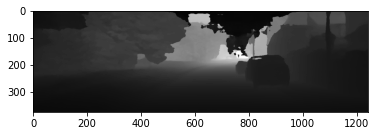

In [17]:
# Visualize Depthmap
import numpy as np
img_array = np.load('KITTI/testing/depth_maps/001018.npy')

from matplotlib import pyplot as plt

plt.imshow(img_array,cmap='gray')
plt.show()

In [23]:
# Saving Images
import numpy as np
from PIL import Image
import os

depthimage_save_path = "KITTI/testing/depth_maps_images/" 
if not os.path.exists(depthimage_save_path):
    os.makedirs(depthimage_save_path)
im_depth = Image.fromarray(img_array)
im_depth.convert('RGB').save(depthimage_save_path+"depthmap_image.png")

### KITTI Folder Should Contains the following:
>KITTI/ <br>
>>val.txt <br>
testing/ <br>
>>>image_2/ <br>
image_3/ <br>
calib/ <br>
depth_maps/ <br>
tensorboardx/ <br>
training.log <br>

- tensorboardsx , training.log are information about the model in wasserstien dissparity, Not needed in next steps.

## Part II - Pseudo Lidar V2
### Note:
- [Github link](https://github.com/mileyan/Pseudo_Lidar_V2.git)
- You don't have to clone it, it is already cloned.
- Wasserstien Disparity is part of Pseudo Lidar Github Project, as it is an improved Version of Neural Network, to increase the accuracy.
- So same steps in converting depthmaps to points cloud then Ground planes are the same like in Pseudo Lidar Github.

## Converting depthmaps to Points Cloud
- Inputs: calib, depth_maps.
- Output: points cloud
- Output location : KITTI/testing/velodyne/

In [24]:
# Convert depth maps to Pseudo-Lidar Point Clouds
!python3 ./W-Stereo-Disp/src/preprocess/generate_lidar_from_depth.py --calib_dir  "KITTI/testing/calib" \
    --depth_dir "KITTI/testing/depth_maps/"  \
    --save_dir  "KITTI/testing/velodyne/"

Finish Depth 000018
Finish Depth 000208
Finish Depth 001018
Finish Depth 003018


## Ground Planes

- Inputs : calib, points cloud.
- Outputs : Ground Planes.
- Output location : KITTI/testing/planes/ 

In [25]:
!python3 ./W-Stereo-Disp/src/preprocess/kitti_process_RANSAC.py --calib_dir  "KITTI/testing/calib" \
    --lidar_dir "KITTI/testing/velodyne" \
    --planes_dir  "KITTI/testing/planes"

-------------  000018
[-0.03506511 -0.99938227  0.00234974]
1.660061651276205
-------------  000208
[-0.02679383 -0.99963188 -0.00426614]
1.6816344521225595
-------------  001018
[ 0.00817595 -0.99993581 -0.00784375]
1.6999133584591732
-------------  003018
[-7.01909264e-03 -9.99975300e-01  3.63505805e-04]
1.6791140683781027


### KITTI Folder Should Contains the following:
>KITTI/ <br>
>>val.txt <br>
testing/ <br>
>>>image_2/ <br>
image_3/ <br>
calib/ <br>
depth_maps/ <br>
velodyne/ <br>
planes/ <br>
tensorboardx/ <br>
training.log <br>

# Stage-2 | Avod
- [Github Forked link](https://github.com/AhmedYousriSobhi/avod.git)
- You don't have to clone it, it is already cloned.

## Note:
- If this doesn't run, Remove CMakeCashe.txt from YOUR_PATH/avod/wavedata/wavedata/tools/core

In [26]:
!chmod +x ./avod/scripts/install/build_integral_image_lib.bash
!sh ./avod/scripts/install/build_integral_image_lib.bash

-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV-Project/avod/wavedata/wavedata/tools/core/lib
Scanning dependencies of target integral_images_3d
[ 50%] Building CXX object CMakeFiles/integral_images_3d.dir/integral_images_3d.cpp.o
[100%] Linking CXX shared library libintegral_images_3d.so
[100

In [27]:
!sh ./avod/avod/protos/run_protoc.sh

Compiling protos in /media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV-Project/avod/avod/protos
[libprotobuf WARNING google/protobuf/compiler/parser.cc:562] No syntax specified for the proto file: avod/protos/kitti_dataset.proto. Please use 'syntax = "proto2";' or 'syntax = "proto3";' to specify a syntax version. (Defaulted to proto2 syntax.)
[libprotobuf WARNING google/protobuf/compiler/parser.cc:562] No syntax specified for the proto file: avod/protos/kitti_utils.proto. Please use 'syntax = "proto2";' or 'syntax = "proto3";' to specify a syntax version. (Defaulted to proto2 syntax.)
[libprotobuf WARNING google/protobuf/compiler/parser.cc:562] No syntax specified for the proto file: avod/protos/mini_batch.proto. Please use 'syntax = "proto2";' or 'syntax = "proto3";' to specify a syntax version. (Defaulted to proto2 syntax.)
[libprotobuf WARNING google/protobuf/compiler/parser.cc:562] No syntax specified for the proto file: avod/protos/layers.proto. Pl

### Downloading Checkpoints for Pretrianed Model.
### Note: This model is used to detect Cars Only.

In [47]:
# Checkpoints download
%mkdir avod/avod/data/outputs/pyramid_cars_with_aug_example/checkpoints
%cd avod/avod/data/outputs/pyramid_cars_with_aug_example/checkpoints
!gdown --id 1wuMykUDx8tcCfxpqnprmzrgUyheQV42F
!unzip avod.zip
%rm -r avod.zip
%cd ../../../../..

/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/avod/avod/data/outputs/checkpoints
Downloading...
From: https://drive.google.com/uc?id=1wuMykUDx8tcCfxpqnprmzrgUyheQV42F
To: /media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/avod/avod/data/outputs/checkpoints/avod.zip
100%|████████████████████████████████████████| 248M/248M [01:10<00:00, 3.50MB/s]
Archive:  avod.zip
  inflating: pyramid_cars_with_aug_example_scratch_300_val-00120000.data-00000-of-00001  
  inflating: pyramid_cars_with_aug_example_scratch_300_val-00120000.index  
  inflating: pyramid_cars_with_aug_example_scratch_300_val-00120000.meta  
/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project


### Use these Steps if The inferace cell doesn't work:
File: avod/avod/data/outputs/pyramid_cars_with_aug_example.config 
- in Line 136 - dataset_dir =  change your dataset location.
- in Line 137 - data_split = name of split txt file.
- in Line 139 - data_split_dir = "" -- Empty string.

File: avod/avod/datasets/kitti/kitti_dataset.py - in Line 76
- possible_splits = ['val']
- import sys
- sys.path.insert(1, 'PATH_TO_LOCATION/avod/wavedata')

File: avod/avod/core/evaluator.py - line 373:
- checkpoint_to_restore = 'PATH_TO_LOCATION/avod/avod/data/outputs/pyramid_cars_with_aug_example/checkpoints/pyramid_cars_with_aug_example_scratch_300_val-00120000'

In your dataset dir location, should have: 
- planes folder : output from pseudo-lidar-V2.
- velodyne folder : output from pseudo-lidar-V2.

In file ...... CHange output path.

Dataset testing used in wasserstien, training (testing) used in avod --> change.

## Run Inferance:
- Inputs : All Files in KITTI folder.
- Outputs : labels for car location to be used in Car detection.
- Output location : /avod/avod/data/outputs/pyramid_cars_with_aug_example/predictions/proposals_and_scores/val/120000
### Note: These labels needed to be converted to KITTI label format, So just keep these output files in their place.

In [29]:
# Run Inferance
!python3 avod/avod/experiments/run_inference.py --checkpoint_name='pyramid_cars_with_aug_example' --data_split='val' --ckpt_indices=120 --device='1'

2022-01-03 02:22:13.440290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-03 02:22:13.463954: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-03 02:22:13.464442: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-03 02:22:13.474037: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

2022-01-03 02:22:39.514309: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.72GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-03 02:22:39.514387: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.72GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-03 02:22:39.817330: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.43GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-01-03 02:22:39.817656: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Alloc

In [ ]:
# !python3 avod/demos/show_predictions_2d.py

In [ ]:
# !python3 avod/demos/kitti_bev_vis.py

# Stage-3 | Changing avod label format to KITTI label Format.
- Use Our Script to convert from Avod label format to KITTI label format, just like explaned in this [github](https://github.com/kujason/avod/wiki/Data-Formats)
- You can control the detection threshold by adding a --threshold < value >, defualt value is 0.02

In [30]:
!python3 to_kitti_format.py --avod_label_path "avod/avod/data/outputs/pyramid_cars_with_aug_example/predictions/final_predictions_and_scores/val/120000" \
        --save_path KITTI/testing/label_2

Namespace(avod_label_path='avod/avod/data/outputs/pyramid_cars_with_aug_example/predictions/final_predictions_and_scores/val/120000', save_path='KITTI/testing/label_2', threshold=0.02)
Opening FIle:  000018.txt
Opening FIle:  000208.txt
Opening FIle:  001018.txt
Opening FIle:  003018.txt
COMPLETED


### KITTI Folder Should Contains the following:
>KITTI/ <br>
>>val.txt <br>
testing/ <br>
>>>image_2/ <br>
image_3/ <br>
calib/ <br>
depth_maps/ <br>
velodyne/ <br>
planes/ <br>
label_2/ <br>
tensorboardx/ <br>
training.log <br>

# Stage-4 | Kitti Detect and Vis
- [Github Forked link](https://github.com/AhmedYousriSobhi/kitti_object_vis.git)
- You don't have to clone it, it is already cloned.

In [31]:
%cd kitti_object_vis/

/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV-Project/kitti_object_vis


In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from kitti_object import kitti_object, show_lidar_with_depth, show_lidar_on_image, \
                         show_image_with_boxes, show_lidar_topview_with_boxes


In [33]:
from xvfbwrapper import Xvfb
vdisplay = Xvfb(width=1920, height=1080)
vdisplay.start()
from mayavi import mlab
mlab.init_notebook('ipy') # do not use 'x3d' backend which leads to color missing

Notebook initialized with ipy backend.


In [34]:
dataset = kitti_object("../KITTI", "testing")
# Number of image you want to visualize its BEV
data_idx = 1018
objects = dataset.get_label_objects(data_idx)
pc_velo = dataset.get_lidar(data_idx)
calib = dataset.get_calibration(data_idx)
img = dataset.get_image(data_idx)
img_height, img_width, _ = img.shape

fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 450))
show_lidar_with_depth(pc_velo, objects, calib, fig_3d, True, img_width, img_height)
fig_3d

../KITTI testing
../KITTI/testing/velodyne/001018.bin
('All point num: ', 323621)
('FOV point num: ', (323590, 4))
pc_velo (323590, 4)
==================== (323590, 4)
box3d_pts_3d_velo:
[[ 1.33831961e+01 -2.93686470e+00 -1.59522762e+00]
 [ 1.33297450e+01 -4.59411442e+00 -1.61329758e+00]
 [ 9.37674612e+00 -4.46618318e+00 -1.65325684e+00]
 [ 9.43019719e+00 -2.80893345e+00 -1.63518688e+00]
 [ 1.33661923e+01 -2.95405717e+00  3.18428159e-02]
 [ 1.33127412e+01 -4.61130689e+00  1.37728573e-02]
 [ 9.35974232e+00 -4.48337565e+00 -2.61864027e-02]
 [ 9.41319339e+00 -2.82612592e+00 -8.11644409e-03]]
box3d_pts_3d_velo:
[[ 1.91038384e+01 -3.48985292e+00 -1.44389611e+00]
 [ 1.90504588e+01 -5.04451401e+00 -1.46088132e+00]
 [ 1.53081082e+01 -4.91560728e+00 -1.49862888e+00]
 [ 1.53614878e+01 -3.36094619e+00 -1.48164367e+00]
 [ 1.90881280e+01 -3.50573762e+00  5.94079830e-02]
 [ 1.90347484e+01 -5.06039870e+00  4.24227765e-02]
 [ 1.52923978e+01 -4.93149197e+00  4.67521637e-03]
 [ 1.53457774e+01 -3.3768308

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xc2\x08\x02\x00\x00\x00\x98\x01:\x9…

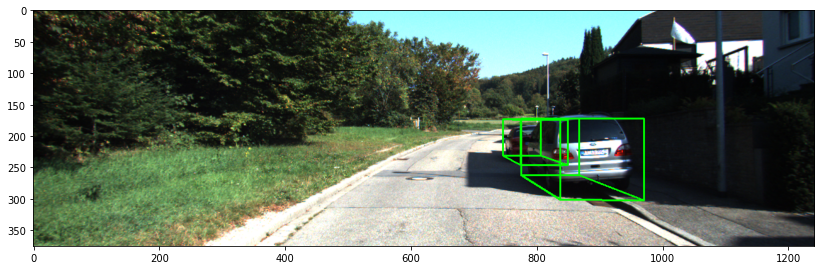

In [35]:
_, img_bbox3d = show_image_with_boxes(img, objects, calib)
img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)

fig_bbox3d = plt.figure(figsize=(14, 7))
ax_bbox3d = fig_bbox3d.subplots()
ax_bbox3d.imshow(img_bbox3d)
plt.show()

top_image: (500, 300, 3)


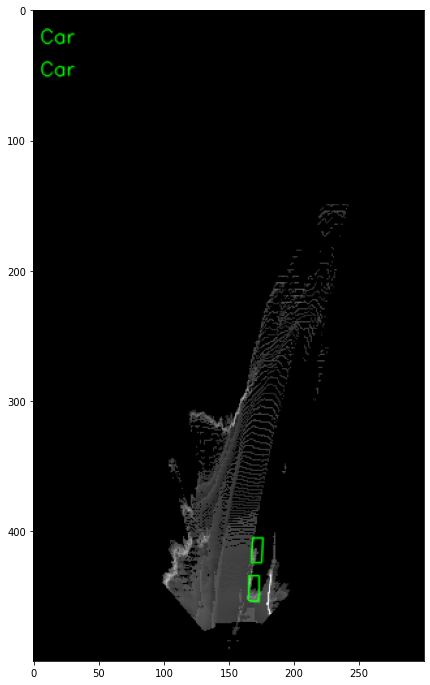

In [36]:
img_bev = show_lidar_topview_with_boxes(pc_velo, objects, calib)

fig_bev = plt.figure(figsize=(7, 14))
ax_bev = fig_bev.subplots()
ax_bev.imshow(img_bev)
plt.show()

In [42]:
# Saving Images
import numpy as np
from PIL import Image
import os

depthimage_save_path = "../KITTI/testing/BEV_3D_images/" 
if not os.path.exists(depthimage_save_path):
    os.makedirs(depthimage_save_path)
    
im_3DBOX = Image.fromarray(img_bbox3d)
im_BEV = Image.fromarray(img_bev)
im_3DBOX.save(depthimage_save_path+"3D_BOX_"+str(data_idx)+".jpeg")
im_BEV.save(depthimage_save_path+"BEV_"+str(data_idx)+".jpeg")